# **Common Discrete Distribution**

### **1. Burnoulli distribution**

* Bernoulli trail: a random experiment get 2 kinds of results: success or failure.
* Doing once Bernoulli trail, define $X$ as the times of *success* events happened.
* $\cal{R}_{\it{x}}=\lbrace 0,1 \rbrace$
* parameter $p$: the probability of success, $0\leq p \leq 1$

* $X\sim\text{Ber}(p)$
    $\implies f_X(x)=p^{x}(1-p)^{(1-x)}, \quad x=0,1$

* $E(X) = 1\times p + 0\times (1-p) = p$
* $Var(X) = 1^2\times p + 0^2\times (1-p) = p$
* $M_X(t) = E(e^{tx})=e^{t。1}\times p + e^{t。0}\times (1-p) = pe^t + q$

In [1]:
import numpy as np
p = 0.1
def Bernoulli(x: int, p: float = 0.1) -> float:
    """Implement Bernoulli pmf function
    Args:
        x (int): the number of success of one trail , {0,1}
        p (float): the probability of success
    Retruns:
        float: pmf value"""
    return np.power(p,x)*np.power((1-p),(1-x))

print("The probability of success: ", Bernoulli(1))
print("The probability of fail: ", Bernoulli(0))

The probability of success:  0.1
The probability of fail:  0.9


### **2. Binomial distribution**

* Binomial theorem: $(a+b)^n = \sum_{x=0}^{n} \begin{pmatrix} n \\ x \end{pmatrix} a^{x}b^{(n-x)}$

* Doing n times independent Burnoulli trail, $X$ represents the times of success.
* $\cal{R}_{\it{x}}=\lbrace 0,1,...,n \rbrace$
* parameters
    * $n$: the number of trials
    * $p$: the probability of success
* $X\sim\cal{B}\it{(n,p)}$
    $\implies f_X(x)=\begin{pmatrix} n \\ x \end{pmatrix}p^{x}(1-p)^{(n-x)}, \quad x=0,1,...,n$
* $E(X) = \sum_{x=0}^{n}x \begin{pmatrix} n \\ x \end{pmatrix}p^{x}(1-p)^{(n-x)}=\sum_{x=0}^{n}x\frac{n!}{x!(n-x)!}p^{x}(1-p)^{(n-x)}$  
    
    $=np\sum_{x=1}^{n}\frac{(n-1)!}{(x-1)![(n-1)-(x-1)]!}p^{(x-1)}(1-p)^{(n-1)-(x-1)}$ 

    $=np\sum_{y=0}^{n}\frac{m!}{y!(m-y)!}p^{y}(1-p)^{m-y}=np$

* $Var(X) = E(X^2) - [E(X)]^2 = [E[X(X-1)] + E(X) - [E(X)]^2 $  

    $= n(n-1)p^2 + np - (np)^2 = np(1-p)$

    * $[E[X(X-1)] = \sum_{x=0}^{n}x(x-1) \begin{pmatrix} n \\ x \end{pmatrix}p^{x}(1-p)^{(n-x)} = \sum_{x=2}^{n}x(x-1) \frac{n!}{x!(n-x)!}p^{x}(1-p)^{(n-x)}$

        $=n(n-1)p^2 \sum_{x=2}^{n} \frac{(n-2)!}{(x-2)![(n-2)-(x-2)]!}p^{(x-2)}(1-p)^{(n-2)-(x-2)}$

        $=n(n-1)p^2 \sum_{y=0}^{n} \frac{m!}{y![m-y]!}p^{y}(1-p)^{m-y}$

        $=n(n-1)p^2$

* $M_X(t) = E(e^{tx})=e^{t。np} \sum_{x=0}^{n} \frac{x!}{x!(n-x)!}p^{x}(1-p)^{(n-x)}e^{-tx}=(pe^{t}+q)^2$

In [2]:
from math import comb
n = 5
p = 0.8
def Binomial(x: int, n: int = 5, p: float = 0.8) -> float:
    """Implement Binomial pmf function
    Args:
        x (int): the number of success of n trails, {0,1,...,n}
        n (int): number of trials
        p (float): the probability of success
    Retruns:
        float: pmf value"""
    return comb(n,x)*np.power(p,x)*np.power((1-p),(n-x))

print("The probability of 3 success out of 5 trails: ", Binomial(3))

The probability of 3 success out of 5 trails:  0.20479999999999993


<Axes: xlabel='x', ylabel='p=0.8'>

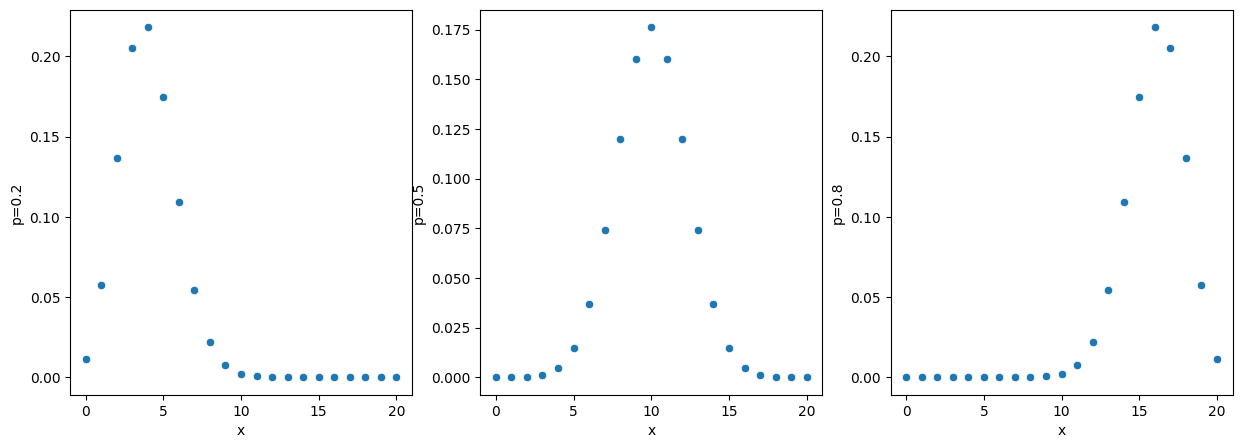

In [3]:
## B(n=10, p=0.2)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame()
df['x'] = np.arange(21)
for p in [0.2, 0.5, 0.8]:
    b = []
    for i in range(21):
        b.append(Binomial(i,20,p))
    df['p='+str(p)] = b

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(
  data=df,
  x='x',
  y='p=0.2'
)
plt.subplot(1,3,2)
sns.scatterplot(
  data=df,
  x='x',
  y='p=0.5'
)
plt.subplot(1,3,3)
sns.scatterplot(
  data=df,
  x='x',
  y='p=0.8'
)


### **3. Geometric distribution**

* Geometric series: $a_1+a_1r+a_1r^2+...+a_1r^{n-1}=\frac{a_1(1-r^n)}{1-r}$
* The number of trails needed until one seccess when doing $n$ Bernoulli trail$
* $\cal{R}_{\it{x}}=\lbrace 0,1,...,\infty \rbrace$
* parameter $p$: the probability of success, $0\leq p \leq 1$

* $X\sim Geo(p)$
    $\implies f_X(x)=p(1-p)^{(x-1)}, \quad x=0,1,...,\infty$ 

* $E(X)=\sum_{i=1}^{\infty}xpq^{x-1}=p\frac{d}{dq}(\sum_{x=1}^{\infty}q^x)=p\frac{d}{dq}(\frac{q}{1-q})=p\frac{1}{(1-q)^2}=\frac{1}{p}$

* $Var(X) = E(X^2) - [E(X)]^2 = [E[X(X-1)] + E(X) - [E(X)]^2 $  

    $=\frac{2q}{p}+\frac{1}{p}-(\frac{1}{p})^2 = \frac{q}{p^2}$

    * $[E[X(X-1)] = \sum_{x=1}^{\infty}x(x-1)q^{x-1} = \sum_{x=2}^{\infty}x(x-1) \frac{q!}{x!(x-1)!}q^{(x-1)}$

        $=pq\sum_{i=1}^{\infty}\frac{d^2}{dq^2}q^x=pq\frac{d^2}{dq^2}(\sum_{x=1}^{\infty}q^x)$

        $=pq\frac{d^2}{dq^2}\frac{q}{1-q}=pq\frac{2}{(1-q)^3}=\frac{2q}{p^2}$

* $M_X(t) = E(e^{tx})=\sum_{i=1}^{\infty}e^{tx}pq^{x-1}=\frac{p}{q}\sum_{i=1}^{\infty}(qe^t)^x=\frac{p}{q}\frac{qe^t}{1-qe^t}=\frac{pe^t}{1-qe^t}$

* Memoryless property: $P(X>a+b|X>a)=P(X>b)$
    * Known that have done a trails, the probability of the number of trails needed from very beginning is larger than $a+b$, is the same the the number of trails needed from now one is larger than $b$

In [4]:
def Geometric(x: int, p: float = 0.5) -> float:
    """Implement Geometric pmf function
    Args:
        x (int): the number of trails needed until one success, {0,1,...,\infty}
        p (float): the probability of success, 0 <= p <= 1
    Retruns:
        float: pmf value"""
    return p*(1-p)**(x-1)

print("The probability of 5 trails until one success: ", Geometric(5))

The probability of 5 trails until one success:  0.03125


### **4. Negative binomial distribution**

* Negative binomial series: $(1-q)^{-r}=\sum_{i=0}^{\infty}\begin{pmatrix} i+r-1 \\ i \end{pmatrix}q^i=\sum_{i=0}^{\infty}\begin{pmatrix} i+r-1 \\ r-1 \end{pmatrix}q^i$

* The number of trails needed until $r$ times seccess when doing $n$ Bernoulli trail
* $\cal{R}_{\it{x}}=\lbrace r,r+1,...,\infty \rbrace$
* parameters
    * $r$: times of success events, $r \in \Bbb{N}$
    * $p$: the probability of success
* $X\sim\cal{NB}(r,p)$

* $E(X)=\sum_{x=r}^{\infty}x\frac{(x-1)!}{(r-1)!(x-r)!} p^rq^{x-r}$
    
    $=\frac{r}{p}\sum_{x=r}^{\infty}\frac{x!}{r!(x-r)!} p^{r+1}q^{x-r}$

    $=\frac{r}{p}\sum_{y=k}^{\infty}\frac{(y-1)!}{((k-1)!(y-k)!} p^{k}q^{y-k}=\frac{r}{p}$

* $Var(X) = E(X^2) - [E(X)]^2 = [E[X(X+1)] - E(X) - [E(X)]^2 $  

    $=\frac{r(r+1)q}{p^2} - \frac{r}{p^2} - \left(\frac{r}{p}\right)^2 = \frac{r(r+1)q}{p^2} - \frac{r^2}{p^2} - \frac{r^2}{p^2} = \frac{rq}{p^2}$

    * $[E[X(X+1)] = \sum_{x=r}^{\infty}x(x+1)\frac{(x-1)!}{(r-1)!(x-r)!} p^rq^{x-r}$  

        $=\frac{(r+1)r}{p^2}\sum_{x=r}^{\infty}\frac{(x+1)!}{(r+1)!(x-r)!}p^{r+2}q^{x-r}$

        $=\frac{(r+1)r}{p^2}\sum_{y=k}^{\infty}\frac{(y-1)!}{(k-1)!(y-k)!}p^{k}q^{y-k}=\frac{(r+1)r}{p^2}$


* $M_x(t) = \sum_{x=r}^{\infty}e^{tx}\frac{(x-1)!}{(r-1)!(x-r)!} p^rq^{x-r}=(pe^t)^r\sum_{x=r}^{\infty}\begin{pmatrix}x-1 \\ r-1\end{pmatrix}(qe^t)^{x-r}$

    $=(pe^t)^r\sum_{i=0}^{\infty}\begin{pmatrix}i+r-1 \\ r-1\end{pmatrix}(qe^t)^{i}=(\frac{pe^t}{1-qe^t})^r$


* Negative binomial is dual function of binomial distribution.
    * $X\sim\cal{B}(n,p)$,  $Y\sim\cal{NB}(r,p)$ $\implies P(X>n) = P(Y < r)$

In [5]:
def NegativeBinomial(x: int, r: int = 10, p: float = 0.5) -> float:
    """Implement Negative binomial pmf function
    Args:
        x (int): the number of trails needed until r times success, {r,r+1,...,\infty}
        r (int): times of success events, 
        p (float): the probability of success, 0 <= p <= 1
    Retruns:
        float: pmf value"""
    if x < r:
        print(f"x input should be equal to or large than r ({r})")
    return comb(x-1,r-1)*(p**r)*(1-p)**(x-r)

print("Then probability of trails until 10 success needed is 20: ", NegativeBinomial(20))

Then probability of trails until 10 success needed is 20:  0.08809852600097656


#### **5. Hyper geometric distribution**

* Hypergeometric series: $\begin{pmatrix} N \\ n \end{pmatrix}=\sum_{i=0}^{n}\begin{pmatrix} K \\ x \end{pmatrix}\begin{pmatrix} N-K \\ n-x \end{pmatrix}$

* There are $N$ items, $K$ are successful class and $N-K$ are failed class. The probability of pick $n$ items (with replacement) and $x$ are successful class.
* $\cal{R}_{\it{x}}=\lbrace 0,1,...,n \rbrace$
* parameters
    * $N$: total number of items, $N \in \Bbb{N}$
    * $K$: number of successful class, $K \in \Bbb{N}$
    * $n$: number of items to pick, $n \in \Bbb{N}$

* $X\sim Hyper(N,K,n)$
    $\implies f_X(x)=\frac{\begin{pmatrix} K \\ x \end{pmatrix}\begin{pmatrix} N-K \\ n-x \end{pmatrix}}{\begin{pmatrix} N \\ n \end{pmatrix}}$

* $E(X)=n\frac{N}{K}$

* $Var(X)=n(\frac{K}{N})(1-\frac{K}{N})(\frac{N-n}{N-1})$

    * $\frac{N-n}{N-1}$ is finite population correction factor.

* When $N \to \infty$, $K \to \infty$ and $\frac{K}{N} \to p$ $\implies Hyper(N,K,n) \to \cal{B}(n,p)$

In [6]:
def HyperGeometric(x: int, N: int = 100, K: int = 80, n: int = 20):
    """Implement Hyper geometric pmf function
    Args:
        x (int): the number of successful items picked, {0,1,...,n}
        N (int): total number of items, N > 0
        K (int): number of successful class, K > 0
        n (int): number of items to pick, n > 0"""
    if x < 0 or x > n:
        print(f"x input should be between 0 and n ({n})")
    return comb(K, x)*comb(N-K, n-x)/comb(N, n)

print("The probability of picking 15 successful items from 100 items with 80 successful ones out of 20 picks: ", HyperGeometric(15))

The probability of picking 15 successful items from 100 items with 80 successful ones out of 20 picks:  0.1919509658690231


### **6. Poisson distribution**

* Marclaurin series: $e^{\lambda}=\frac{e^0}{0!}\lambda^1+\frac{e^1}{1!}\lambda^2+\frac{e^2}{2!}\lambda^3+\frac{e^3}{3!}\lambda^0+...=\sum_{x=0}^{\infty}\frac{\lambda^x}{x!}$

* Poisson process
    * The probability of event happened depends on the interval, not on the start point.
    * The probability of event happened more than twice in a short interval is almost 0.
    * If the intervals are not overlapped, the probabilities of event happened are independent.
    * The expected times of event happend is proportional to the length of interval.

* The times of rare event happned within an interval is defined as $X$

* $\cal{R}_{\it{x}}=\lbrace 0,1,...,\infty \rbrace$

* parameter $\lambda$: the expected happened times of event in an interval

* $X\sim\text{Poi}(\lambda)$ $\implies f_X(x)=\frac{e^{-\lambda}\lambda^x}{x!}$

* $E(X)=\sum_{x=0}^{\infty}x\frac{e^{-\lambda}{\lambda}^{x}}{x!}=e^{-\lambda}\sum_{x=1}^{\infty}x\frac{{\lambda}^{x}}{x!}=e^{-\lambda}\lambda\sum_{x=1}^{\infty}\frac{{\lambda}^{x-1}}{(x-1)!}=e^{-\lambda}\lambda\sum_{y=0}^{\infty}\frac{{\lambda}^y}{y!}=e^{-\lambda}\lambda e^{\lambda}=\lambda$

* $Var(X)=E(X^2)-[E(X)]^2=E[X(X-1)]+E(X)-[E(X)]^2={\lambda}^2+\lambda-{\lambda}^2=\lambda$
    * $E[X(X-1)]=\sum_{x=0}^{\infty}x(x-1)\frac{e^{-\lambda}{\lambda}^{x}}{x!}=e^{-\lambda}\sum_{x=2}^{\infty}x(x-1)\frac{{\lambda}^{x}}{x!}=e^{-\lambda}{\lambda}^2\sum_{x=2}^{\infty}\frac{{\lambda}^{x-2}}{(x-2)!}=e^{-\lambda}{\lambda}^2\sum_{y=0}^{\infty}\frac{{\lambda}^y}{y!}=e^{-\lambda}{\lambda}^2 e^{\lambda}={\lambda}^2$

* $M(t)=E(e^{tx})=\sum_{x=0}^{\infty}e^{tx}\frac{e^{-\lambda}{\lambda}^{x}}{x!}=e^{-\lambda}\frac{{(\lambda e^t)}^{x}}{x!}=e^{-\lambda}e^{\lambda e^t}=e^{\lambda(e^t-1)}$

* additivity:  
    $\perp \begin{cases} X \sim \text{Poi}(\lambda_1) \\ Y \sim \text{Poi}(\lambda_2) \end{cases} \implies U=X+Y \sim \text{Poi}(\lambda_1+\lambda_2)$

* When $n \to \infty$ and $p \to 0$, and $np \to \lambda$, $\cal{B}(n,p) \to \text{Poi}(\lambda)$

In [7]:
def Poisson(x: int, lam: float = 5) -> float:
    """Implement Poisson pmf function
    Args:
        x (int): the number of success, {0,1,...,\infty}
        lam (float): the average number of success in a given time interval
    Retruns:
        float: pmf value"""
    return np.exp(-lam)*np.power(lam,x)/np.math.factorial(x)
print("The probability of 3 success in a given time interval with average 5: ", Poisson(3))

The probability of 3 success in a given time interval with average 5:  0.14037389581428056


<Axes: xlabel='x', ylabel='lambda=15'>

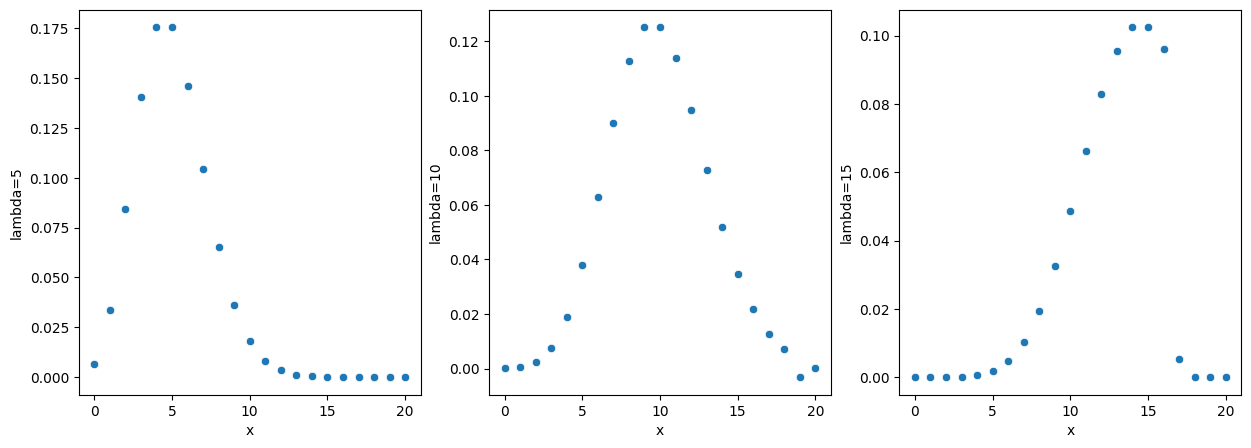

In [8]:
df = pd.DataFrame()
df['x'] = np.arange(21)
p_5 = list()
p_10 = list()
p_15 = list()
for p in df['x']:
    p_5.append(Poisson(p, 5))
    p_10.append(Poisson(p, 10))
    p_15.append(Poisson(p, 15))
df['lambda=5'] = p_5
df['lambda=10'] = p_10
df['lambda=15'] = p_15

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(
  data=df,
  x='x',
  y='lambda=5'
)
plt.subplot(1,3,2)
sns.scatterplot(
  data=df,
  x='x',
  y='lambda=10'
)
plt.subplot(1,3,3)
sns.scatterplot(
  data=df,
  x='x',
  y='lambda=15'
)

### **7. Discrete uniform distribution**

* The probability of $X$ at each point is the same

* $\cal{R}_{\it{x}}=\lbrace 0,1,...,N \rbrace$

* parameter $N$: upperbound, $N \in \Bbb{N}$

* $X\sim\cal{DU}(N)$ $\implies f_X(x)=\frac{1}{N}$

* $E(X)=\sum_{x=1}^{N}x\frac{1}{N}=\frac{1}{N}\frac{N(N+1)}{2}=\frac{1+N}{2}$

* $Var(X)=E(X^2)-[E(X)]^2=\frac{(N+1)(2N+1)}{6}-(\frac{1+N}{2})^2=\frac{N^2-1}{12}$

    * $E(X^2)=\sum_{x=1}^{N}x^2\frac{1}{N}=\frac{1}{N}\frac{N(N+1)(2N+1)}{6}=\frac{(N+1)(2N+1)}{6}$

* $M(t)=E(e^{tx})= \frac{1}{N}\lbrace\frac{e^t(1-e^{Nt})}{1-e^t}\rbrace$

In [9]:
def DiscreteUniform(x: int, a: int = 1, b: int = 6) -> float:
    """Implement Discrete Uniform pmf function
    Args:
        x (int): the number of success, {a,a+1,...,b}
        a (int): the minimum value
        b (int): the maximum value
    Retruns:
        float: pmf value"""
    if x < a or x > b:
        print(f"x input should be between {a} and {b}")
    return 1/(b-a+1)
print("The probability of rolling a 3 with a dice: ", DiscreteUniform(3))

The probability of rolling a 3 with a dice:  0.16666666666666666
